In [1]:
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.0



## Imagem original

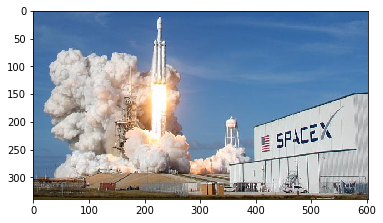

In [19]:
imagem = cv2.imread('falcon.jpg')
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
imshow(img)
#imshow(np.asarray(imagem[:, :, ::-1])) # altera a ultima dimensão para trocar azul por vermelho -> BRG to RGB

## Histograma da imagem em tons de cinza

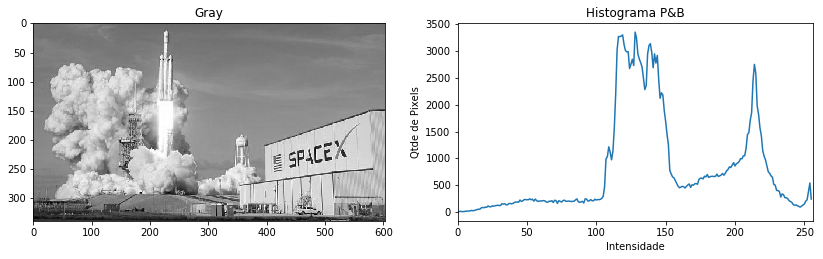

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B
plt.figure(figsize=(14, 8)) # LARGGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Gray')
plt.imshow(gray, cmap='gray')

#Função calcHist para calcular o hisograma da imagem
h = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Histograma P&B")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

## Histograma da imagem em barras

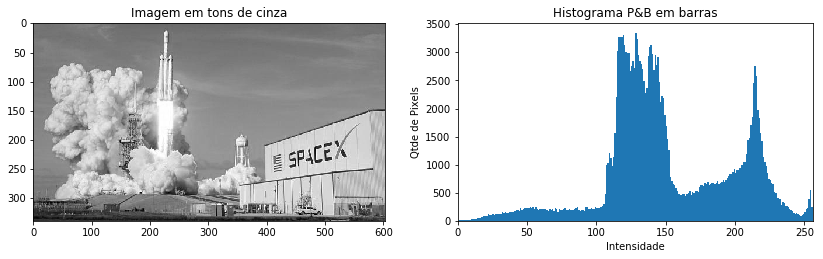

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B
plt.figure(figsize=(14, 8)) # LARGGura e ALTura da imagem total em polegadas 
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Imagem em tons de cinza')
plt.imshow(gray, cmap='gray')

#Utilizando a função ravel() e plt.hist()
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Histograma P&B em barras")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(gray.ravel(),256,[0,256])
plt.xlim([0, 256])
plt.show()

## Histograma da imagem colorida

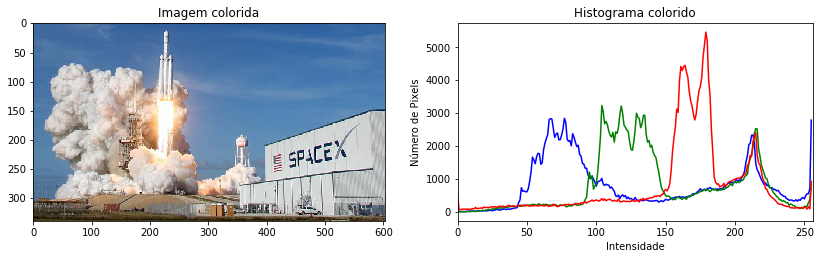

In [34]:
plt.figure(figsize=(14, 8)) # LARGGura e ALTura da imagem total em polegadas 
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Imagem colorida')
plt.imshow(img, cmap='gray')

#Separa os canais
canais = cv2.split(img)
cores = ("b", "g", "r")
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Histograma colorido")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")
for (canal, cor) in zip(canais, cores):
    #Este loop executa 3 vezes, uma para cada canal
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, cor)
    plt.xlim([0, 256])
plt.show()


## Equalização de Histograma

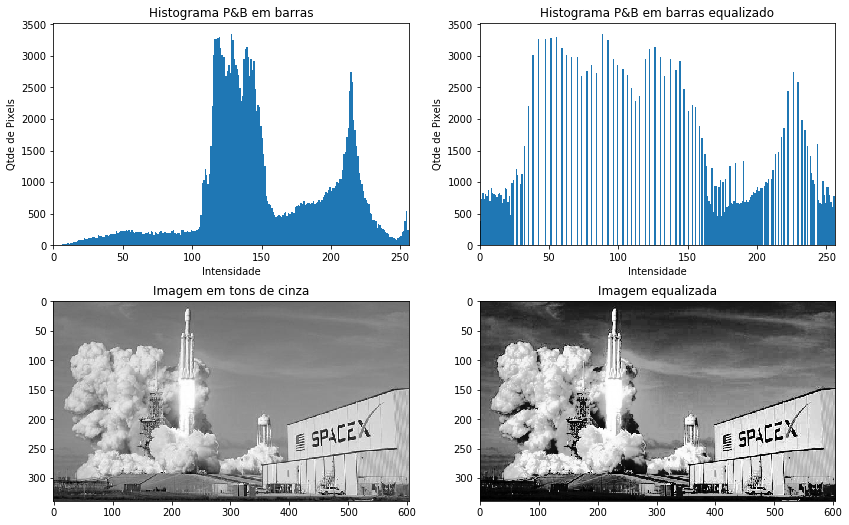

In [51]:
plt.figure(figsize=(14, 9)) # LARGGura e ALTura da imagem total em polegadas
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B
#Utilizando a função ravel() e plt.hist()
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Histograma P&B em barras")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(gray.ravel(),256,[0,256])
plt.xlim([0, 256])

h_eq = cv2.equalizeHist(gray)
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Histograma P&B em barras equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(),256,[0,256])
plt.xlim([0, 256])

plt.subplot2grid((2,2),(1,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Imagem em tons de cinza")
plt.imshow(gray, cmap='gray')

plt.subplot2grid((2,2),(1,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Imagem equalizada")
plt.imshow(h_eq, cmap='gray')

plt.show()